<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and load Data

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense , Dropout , Flatten, Conv2D, MaxPool2D

In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
print(fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 2

In [22]:
class_name = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

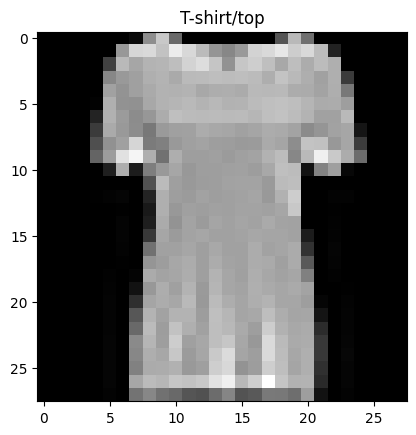

In [23]:
index = 10
plt.imshow(x_train[index], cmap='gray')
plt.title(f'{class_name[y_train[index]]}')
plt.show()

# Modeling

**Normalization**

In [24]:
x_train = x_train / 255
x_test = x_test / 255

In [25]:
y_test = utils.to_categorical(y_test)
y_train = utils.to_categorical(y_train)

**Model Architecture**

In [26]:
reg = keras.regularizers.l2(0.001)

In [27]:
model = keras.models.Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu', strides=1, padding='same', input_shape=(28,28,1),name = 'conv1'))
model.add(Dropout(0.1,name = 'drop1'))
model.add(MaxPool2D(name = 'pool1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same',name = 'conv2'))
model.add(Dropout(0.1,name = 'drop2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(units=230,activation='relu',name = 'hidden1',kernel_regularizer=reg))
model.add(Dropout(0.5,name = 'drop3'))
model.add(Dense(units=230,activation='relu',name = 'hidden2',kernel_regularizer=reg))
model.add(Dropout(0.5,name = 'drop4'))
model.add(Dense(units=10,activation='softmax',name = 'output'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 24)        240       
                                                                 
 drop1 (Dropout)             (None, 28, 28, 24)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 24)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        6944      
                                                                 
 drop2 (Dropout)             (None, 14, 14, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 6272)              0         
                                                                 
 hidden1 (Dense)             (None, 230)              

**Compile Model**

In [29]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
metrics = tf.metrics.CategoricalAccuracy()
loss = tf.losses.CategoricalCrossentropy()

model.compile(optimizer = opt, loss = loss, metrics = metrics)

**Fit Model**

In [30]:
history = model.fit(x_train, y_train, epochs = 80, validation_split = 0.2, batch_size = 100, verbose = 2)

Epoch 1/80
480/480 - 4s - loss: 1.5534 - categorical_accuracy: 0.6270 - val_loss: 1.0052 - val_categorical_accuracy: 0.8048 - 4s/epoch - 9ms/step
Epoch 2/80
480/480 - 3s - loss: 1.0374 - categorical_accuracy: 0.7810 - val_loss: 0.8543 - val_categorical_accuracy: 0.8371 - 3s/epoch - 6ms/step
Epoch 3/80
480/480 - 2s - loss: 0.9024 - categorical_accuracy: 0.8155 - val_loss: 0.7805 - val_categorical_accuracy: 0.8505 - 2s/epoch - 4ms/step
Epoch 4/80
480/480 - 2s - loss: 0.8152 - categorical_accuracy: 0.8345 - val_loss: 0.7086 - val_categorical_accuracy: 0.8618 - 2s/epoch - 4ms/step
Epoch 5/80
480/480 - 2s - loss: 0.7533 - categorical_accuracy: 0.8466 - val_loss: 0.6700 - val_categorical_accuracy: 0.8664 - 2s/epoch - 5ms/step
Epoch 6/80
480/480 - 2s - loss: 0.7028 - categorical_accuracy: 0.8544 - val_loss: 0.6201 - val_categorical_accuracy: 0.8761 - 2s/epoch - 4ms/step
Epoch 7/80
480/480 - 3s - loss: 0.6640 - categorical_accuracy: 0.8602 - val_loss: 0.5924 - val_categorical_accuracy: 0.8777 

# Testing and Evaluation

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2944 - categorical_accuracy: 0.9251


[0.29441794753074646, 0.9251000285148621]

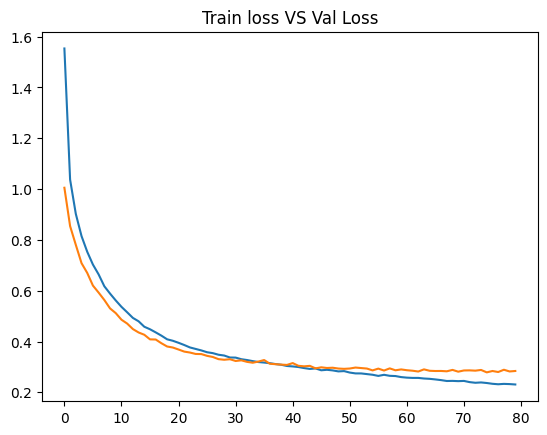

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss VS Val Loss')
plt.show()

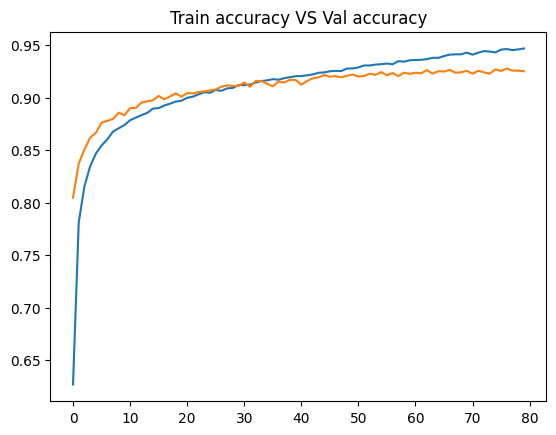

In [33]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Train accuracy VS Val accuracy')
plt.show()

313/313 [==============================] - 1s 2ms/step


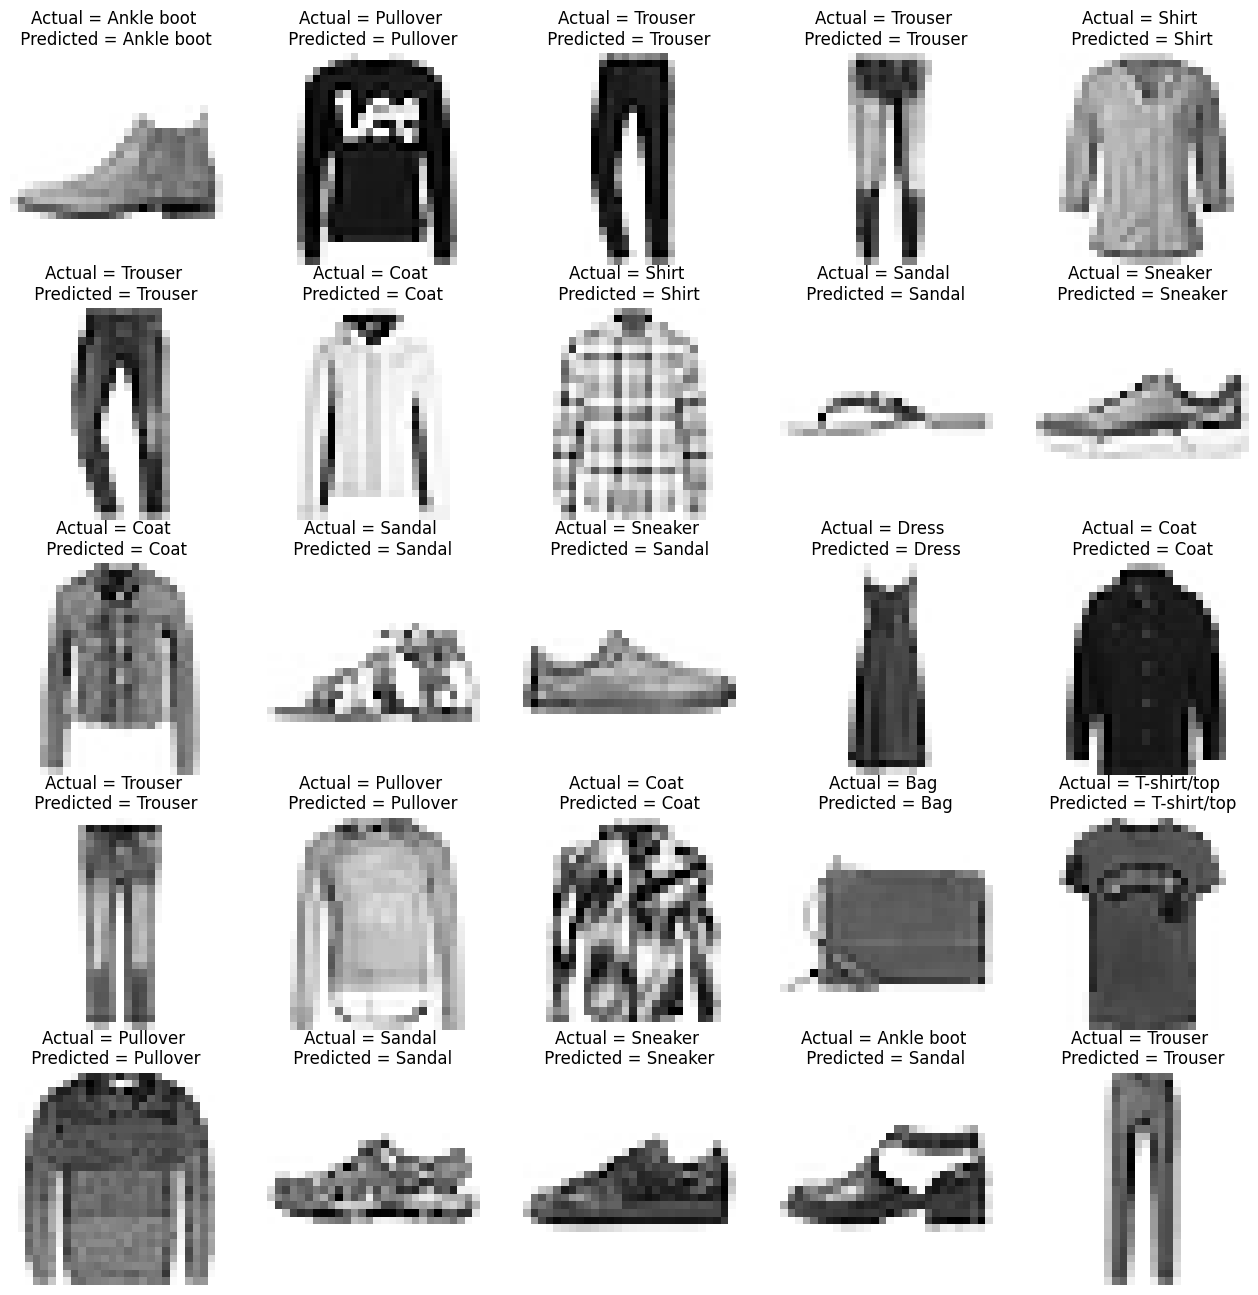

In [34]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i],cmap='Greys')
    plt.axis('off')
    plt.title("Actual = {} \n Predicted = {} ".format(class_name[y_test[i].argmax()],class_name[y_pred[i]]))

# Save Model

In [35]:
model.save('/content/drive/MyDrive/Colab Notebooks/Fashion_MNIST/Fashion_MNIST_Model.h5')